### 1. Data Visualization

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading out dataset from previous notebook

urldata = pd.read_csv("../preprocessing/Url_Processed.csv")
urldata.drop(["Unnamed: 0"],axis=1,inplace=True)

urldata.head(10)

,url,label,url_length,hostname_length,path_length,fd_length,count@,count?,count%,count.,...,count-http,count-https,count-www,count-digits,count-letters,count_dir,count_redirection,use_of_ip,short_url,prefix_Suffix
0,https://www.google.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0
1,https://www.youtube.com,0,23,15,0,0,0,0,0,2,...,1,1,1,0,18,0,0,1,1,0
2,https://www.facebook.com,0,24,16,0,0,0,0,0,2,...,1,1,1,0,19,0,0,1,1,0
3,https://www.baidu.com,0,21,13,0,0,0,0,0,2,...,1,1,1,0,16,0,0,1,1,0
4,https://www.wikipedia.org,0,25,17,0,0,0,0,0,2,...,1,1,1,0,20,0,0,1,1,0
5,https://www.reddit.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,-1,0
6,https://www.yahoo.com,0,21,13,0,0,0,0,0,2,...,1,1,1,0,16,0,0,1,1,0
7,https://www.google.co.in,0,24,16,0,0,0,0,0,3,...,1,1,1,0,18,0,0,1,1,0
8,https://www.qq.com,0,18,10,0,0,0,0,0,2,...,1,1,1,0,13,0,0,1,1,0
9,https://www.amazon.com,0,22,14,0,0,0,0,0,2,...,1,1,1,0,17,0,0,1,1,0


In [3]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632508 entries, 0 to 632507
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   url                632508 non-null  object
 1   label              632508 non-null  int64 
 2   url_length         632508 non-null  int64 
 3   hostname_length    632508 non-null  int64 
 4   path_length        632508 non-null  int64 
 5   fd_length          632508 non-null  int64 
 6   count@             632508 non-null  int64 
 7   count?             632508 non-null  int64 
 8   count%             632508 non-null  int64 
 9   count.             632508 non-null  int64 
 10  count=             632508 non-null  int64 
 11  count-http         632508 non-null  int64 
 12  count-https        632508 non-null  int64 
 13  count-www          632508 non-null  int64 
 14  count-digits       632508 non-null  int64 
 15  count-letters      632508 non-null  int64 
 16  count_dir          6

In [4]:
# remove uneccessary columns
urldata.drop(["url"],axis=1,inplace=True)

<Axes: >

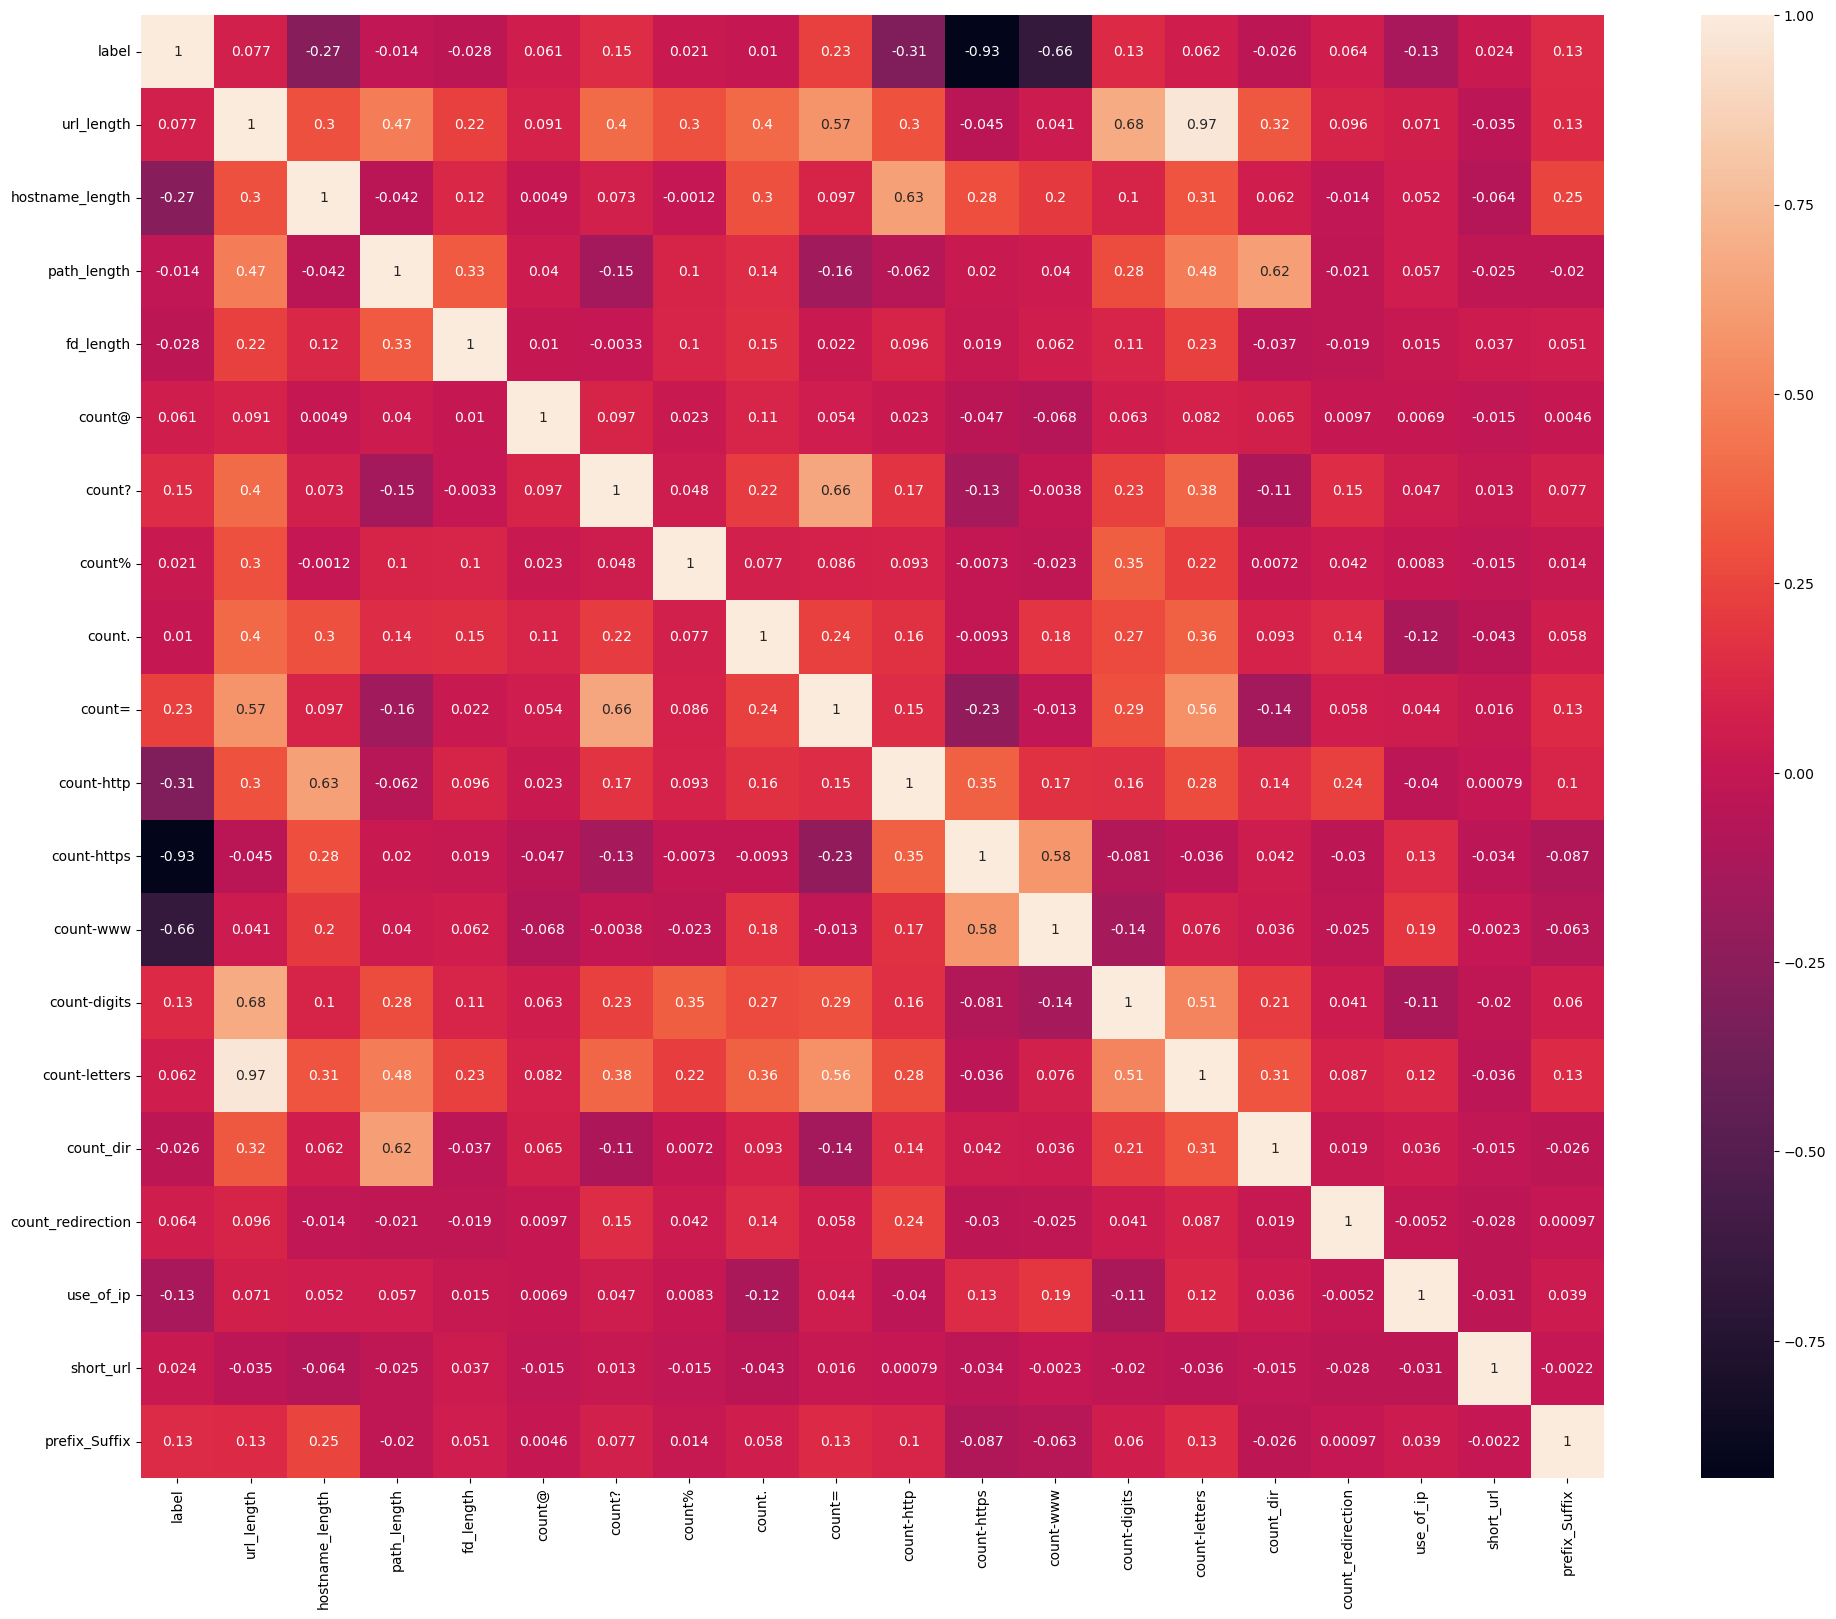

In [5]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

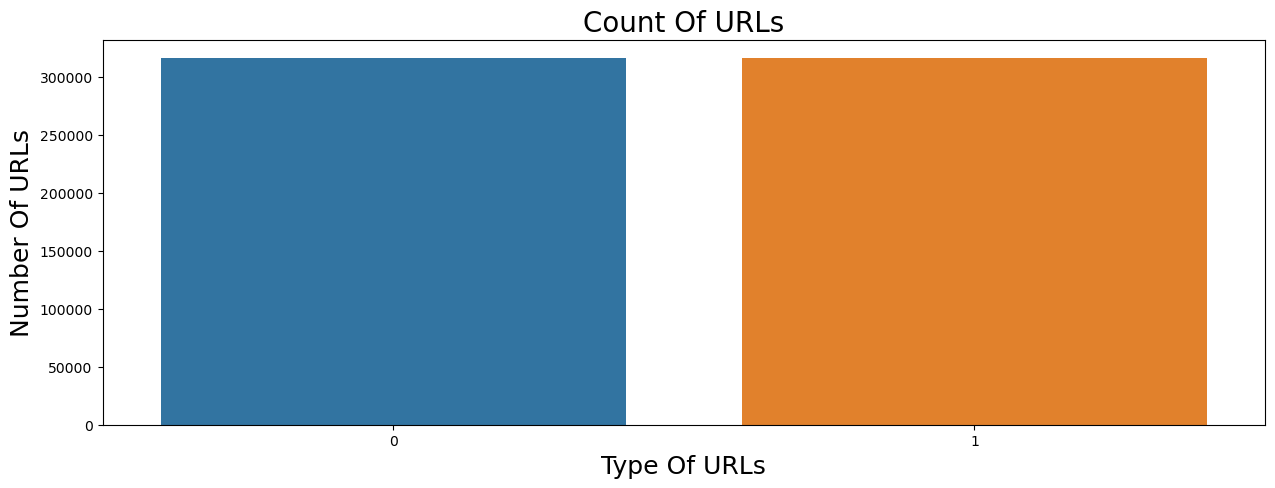

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

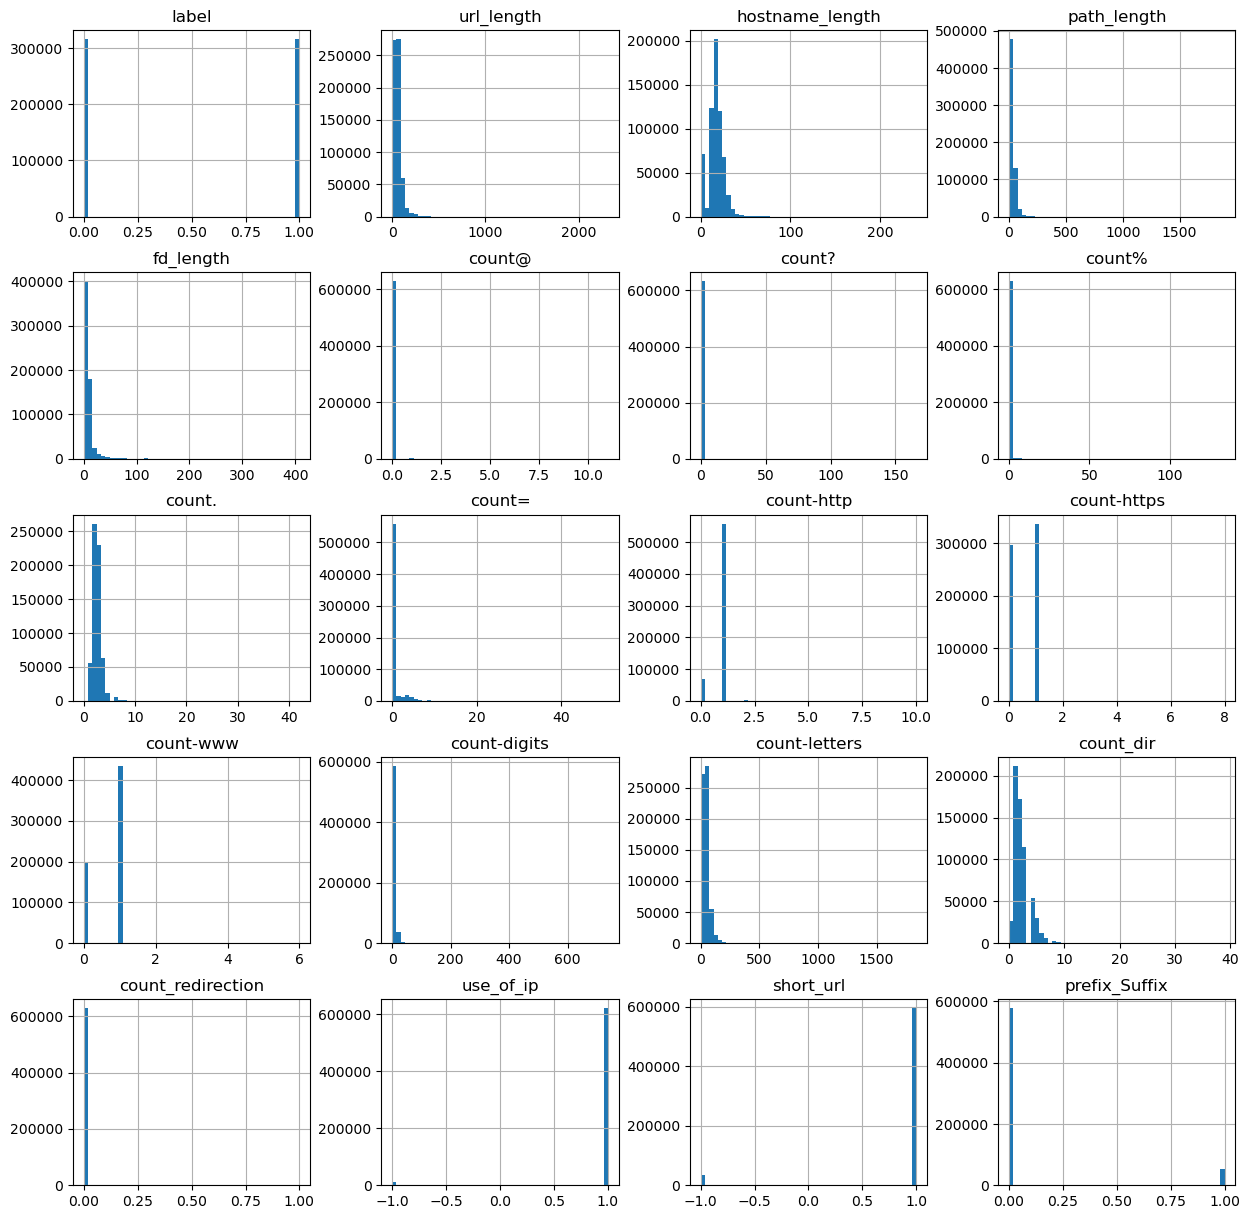

In [7]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

## 2. Model Taining

We will be using three models for our classification.
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. XGBoost

### Data Splitting
We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

In [9]:
#Predictor Variables
x = urldata[['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']]

#Target Variable
y = urldata['label']

In [10]:
x.shape

(632508, 17)

In [11]:
y.shape

(632508,)

In [12]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

### 2.1 Decision Tree

In [13]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)

0.9945751738612312

In [14]:
# calculating other classification metrics
print(classification_report(dt_predictions,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       0.99      0.99      0.99    252858
   malicious       0.99      0.99      0.99    253149

    accuracy                           0.99    506007
   macro avg       0.99      0.99      0.99    506007
weighted avg       0.99      0.99      0.99    506007



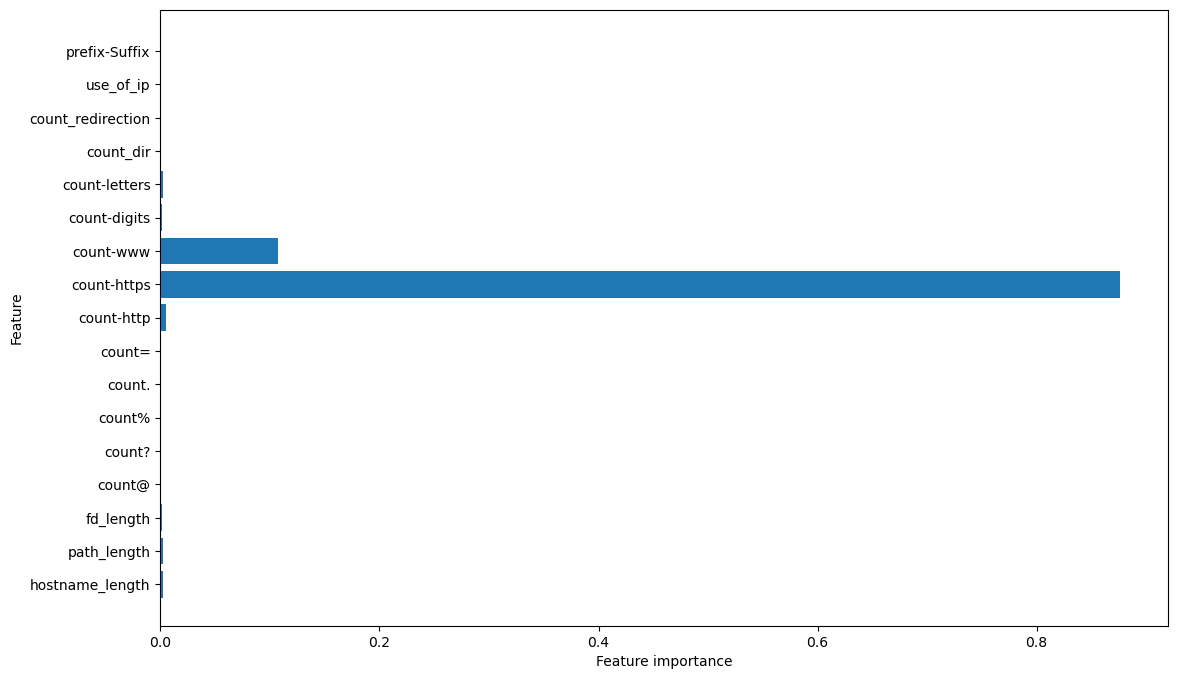

In [15]:
feature_names = ['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix-Suffix']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), dt_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### 2.2 Random Forest

In [16]:
#Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.996498072161057

In [17]:
# calculating other classification metrics
print(classification_report(rfc_predictions,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      0.99      1.00    253527
   malicious       0.99      1.00      1.00    252480

    accuracy                           1.00    506007
   macro avg       1.00      1.00      1.00    506007
weighted avg       1.00      1.00      1.00    506007



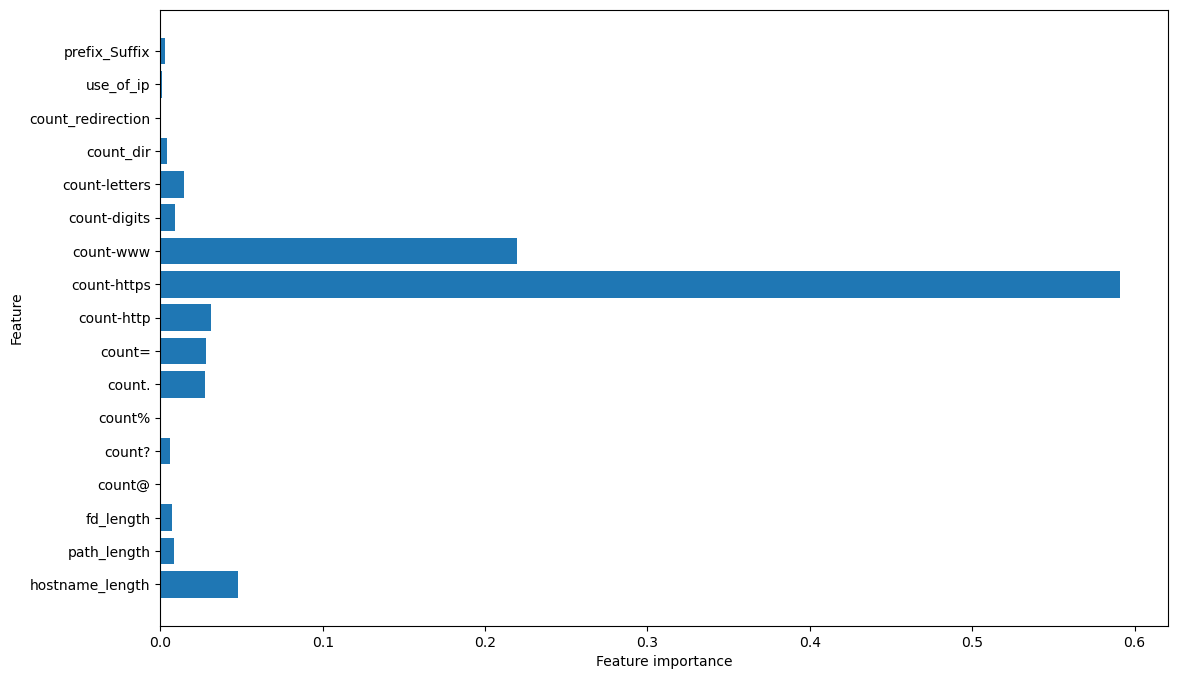

In [18]:
feature_names = ['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### 2.3 Logistic Regression

In [19]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

C:\Users\AdnanAzem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.994901256306731

In [20]:
# calculating other classification metrics
print(classification_report(log_predictions,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      0.99      0.99    253891
   malicious       0.99      1.00      0.99    252116

    accuracy                           0.99    506007
   macro avg       0.99      0.99      0.99    506007
weighted avg       0.99      0.99      0.99    506007



### 2.4 XGBoost

In [21]:
#XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train,y_train)

xg_predictions = xgb_model.predict(x_test)
accuracy_score(y_test,xg_predictions)

0.9964862146175844

In [22]:
# calculating other classification metrics
print(classification_report(xg_predictions,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      0.99      1.00    253625
   malicious       0.99      1.00      1.00    252382

    accuracy                           1.00    506007
   macro avg       1.00      1.00      1.00    506007
weighted avg       1.00      1.00      1.00    506007



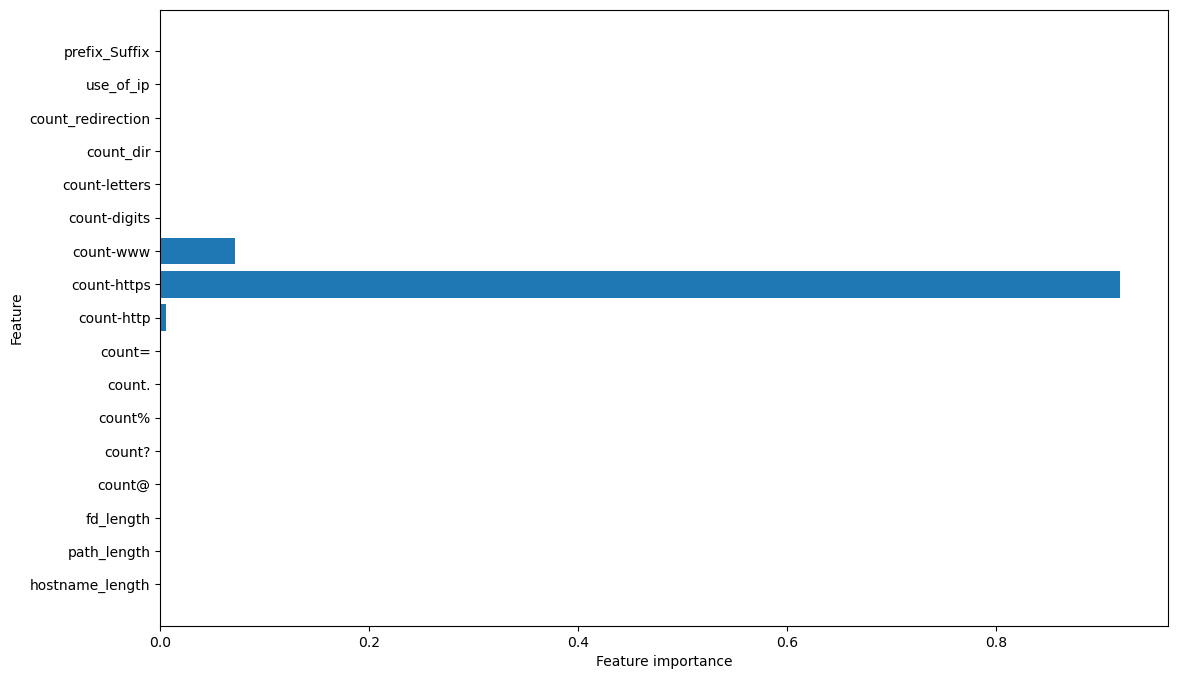

In [23]:
feature_names = ['hostname_length','path_length','fd_length',
             'count@','count?','count%','count.','count=','count-http',
             'count-https','count-www','count-digits','count-letters',
             'count_dir','count_redirection','use_of_ip','prefix_Suffix']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), xgb_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Save the model

In [24]:
import joblib
model = open("../models/RandomForest.pkl","wb")
joblib.dump(rfc, model)
model.close()

In [25]:
model = open("../models/DisicionTree.pkl","wb")
joblib.dump(dt_model, model)
model.close()